/var/folders/89/ky6nw_6n6cd2jjqcy81gwhkc0000gn/T/ipykernel_19616/3753234176.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['loudness'] = (df_selected['loudness'] + 20) * 5
/var/folders/89/ky6nw_6n6cd2jjqcy81gwhkc0000gn/T/ipykernel_19616/3753234176.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[index, "danceability"] *= 100
/var/folders/89/ky6nw_6n6cd2jjqcy81gwhkc0000gn/T/ipykernel_19616/3753234176.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

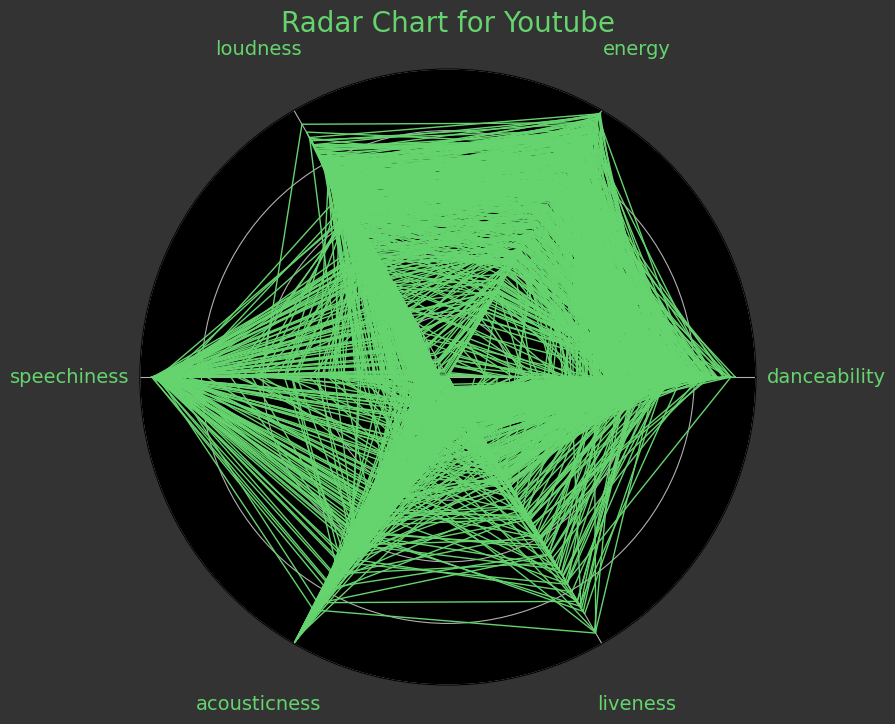

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取 CSV 文件
# df = pd.read_csv("tiktok.csv", encoding='GBK')
# df = pd.read_csv("Spotify 2010 - 2020 Top 100 Songs-3.csv")
df = pd.read_csv("Spotify_Youtube.csv", encoding='latin1')
# 选择其中的六个属性
selected_attributes = ["danceability",	"energy",	"loudness",		"speechiness",	"acousticness",	"liveness"]

df = df.sort_values(by='Stream').head(500)
df_selected = df[selected_attributes]



# 绘制雷达图
labels=np.array(selected_attributes)
stats=df_selected.iloc[0].values

# 角度
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()

# 使雷达图封闭
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

patch = fig.patch
patch.set_color("#333333")
# 将 loudness 数据映射到目标范围内
df_selected['loudness'] = (df_selected['loudness'] + 20) * 5
for index, row in df_selected.iterrows():

    df_selected.loc[index, "danceability"] *= 100
    df_selected.loc[index, 'energy'] *= 100
    df_selected.loc[index, 'speechiness'] *= 100
    df_selected.loc[index, 'acousticness'] *= 100
    df_selected.loc[index, 'liveness'] *= 100


ax.plot(angles, stats, color='#65D46E', linewidth=2)

# 添加每一行的雷达图
for i in range(1, len(df_selected)):
    stats=df_selected.iloc[i].values
    stats=np.concatenate((stats,[stats[0]]))
    ax.plot(angles, stats, color='#65D46E', linewidth=1)

# 设置背景颜色和图例颜色
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_facecolor('black')
ax.set_xticklabels(selected_attributes)
ax.tick_params(axis='x', colors='#65D46E', labelsize=14, pad=40)
ax.tick_params(axis='y', colors='#65D46E', labelsize=14, pad=20)

ax.set_ylim(0, 100)
# 设置标题颜色和字体大小
plt.title("Radar Chart for Youtube", color='#65D46E', fontsize=20)
plt.show()


/var/folders/89/ky6nw_6n6cd2jjqcy81gwhkc0000gn/T/ipykernel_19616/2800153560.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(selected_attributes)


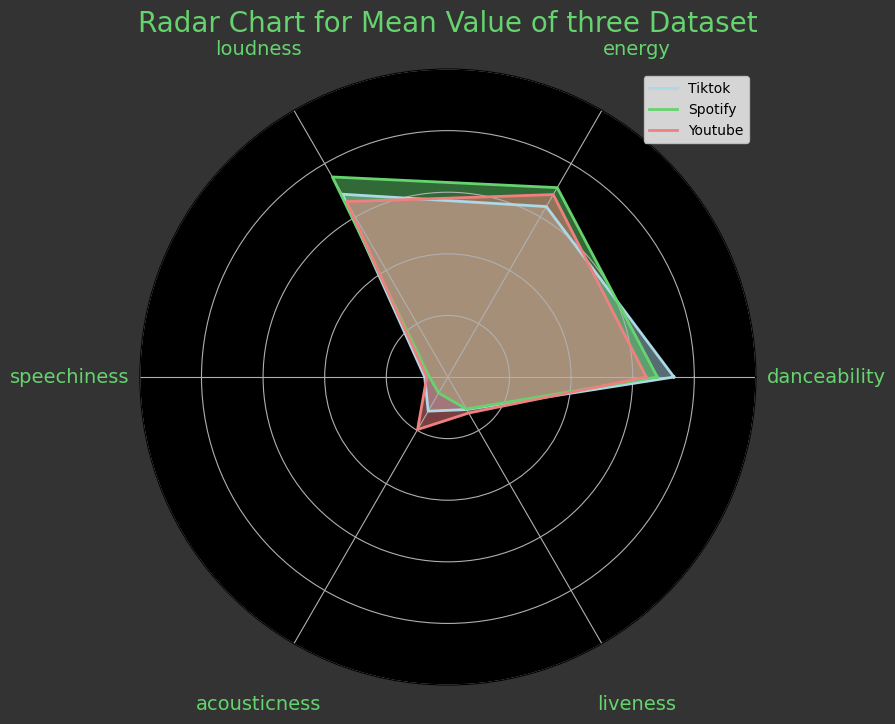

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取三个数据集文件
df1 = pd.read_csv("tiktok.csv",encoding="GBK")
df2 = pd.read_csv("Spotify 2010 - 2020 Top 100 Songs-3.csv")
df3 = pd.read_csv("Spotify_Youtube.csv",encoding='latin1').sort_values(by='Stream').head(1000)
df1= df1[selected_attributes]
df2= df2[selected_attributes]
df3= df3[selected_attributes]

df1['loudness'] = (df1['loudness'] + 20) * 5
df2['loudness'] = (df2['loudness'] + 20) * 5
df3['loudness'] = (df3['loudness'] + 20) * 5

df3.loc[:, "danceability"] *= 100
df3.loc[:, 'energy'] *= 100
df3.loc[:, 'speechiness'] *= 100
df3.loc[:, 'acousticness'] *= 100
df3.loc[:, 'liveness'] *= 100
# 绘制雷达图
avg1 = df1.median()
avg2 = df2.median()
avg3 = df3.median()

# 提取属性名称
attributes = avg1.index.tolist()

# 提取平均值
values1 = avg1.values.tolist()
values2 = avg2.values.tolist()
values3 = avg3.values.tolist()

# 角度
angles=np.linspace(0, 2*np.pi, len(attributes), endpoint=False).tolist()

# 使雷达图封闭
values1=np.concatenate((values1,[values1[0]]))
values2=np.concatenate((values2,[values2[0]]))
values3=np.concatenate((values3,[values3[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 绘制雷达图
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
patch = fig.patch
patch.set_color("#333333")
# 绘制每个文件的雷达图
ax.fill(angles, values1, color='lightblue', alpha=0.5)
ax.plot(angles, values1, color='lightblue', linewidth=2, label='Tiktok')

ax.fill(angles, values2, color='#65D46E', alpha=0.5)
ax.plot(angles, values2, color='#65D46E', linewidth=2, label='Spotify')

ax.fill(angles, values3, color='lightcoral', alpha=0.5)
ax.plot(angles, values3, color='lightcoral', linewidth=2, label='Youtube')

# 设置极坐标轴的范围
ax.set_ylim(0, 100)
ax.set_yticklabels([])
ax.set_facecolor('black')
ax.set_xticklabels(selected_attributes)
ax.tick_params(axis='x', colors='#65D46E', labelsize=14, pad=40)
ax.tick_params(axis='y')
# 设置雷达图的属性
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)


# 添加图例
plt.legend(loc='upper right')

plt.title("Radar Chart for Mean Value of three Dataset", color='#65D46E', fontsize=20)
# 显示雷达图
plt.show()
